# AI Life Guidance system - Exploratory Data Analysis

## 1. Introduction
This notebook explores the synthetic data provided for the AI Life Guidance system. 
We aim to understand:
- The demographic distribution of users.
- The types and intensity of life events they face.
- Potential correlations between profile traits and event patterns.

This analysis informs the rule-based logic and the stress prediction model.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Set Style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..')))
from src.data_loader import DataLoader

%matplotlib inline

## 2. Data Loading & Overview

In [5]:
loader = DataLoader('../data')
data = loader.load_all()
users = data['users']
events = data['events']

print(f"Users Loaded: {users.shape[0]}")
print(f"Events Loaded: {events.shape[0]}")
display(users.head())

Users Loaded: 10
Events Loaded: 13


,user_id,age,gender,city,profession,personality_type,risk_appetite,relationship_status
0,1,27,M,Bangalore,Software Engineer,Analytical,High,Single
1,2,33,F,Mumbai,Marketing Manager,Expressive,Medium,Married
2,3,41,M,Delhi,Operations Lead,Practical,Low,Married
3,4,24,F,Pune,Student,Dreamer,Medium,Single
4,5,36,F,Hyderabad,Product Manager,Analytical,High,In a relationship


## 3. Demographic Analysis
Let's look at the breakdown of our user base by Personality and Profession.

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2772\3291542198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users, x='personality_type', palette='viridis', ax=axes[0])
C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2772\3291542198.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users, x='risk_appetite', palette='magma', order=['Low', 'Medium', 'High'], ax=axes[1])


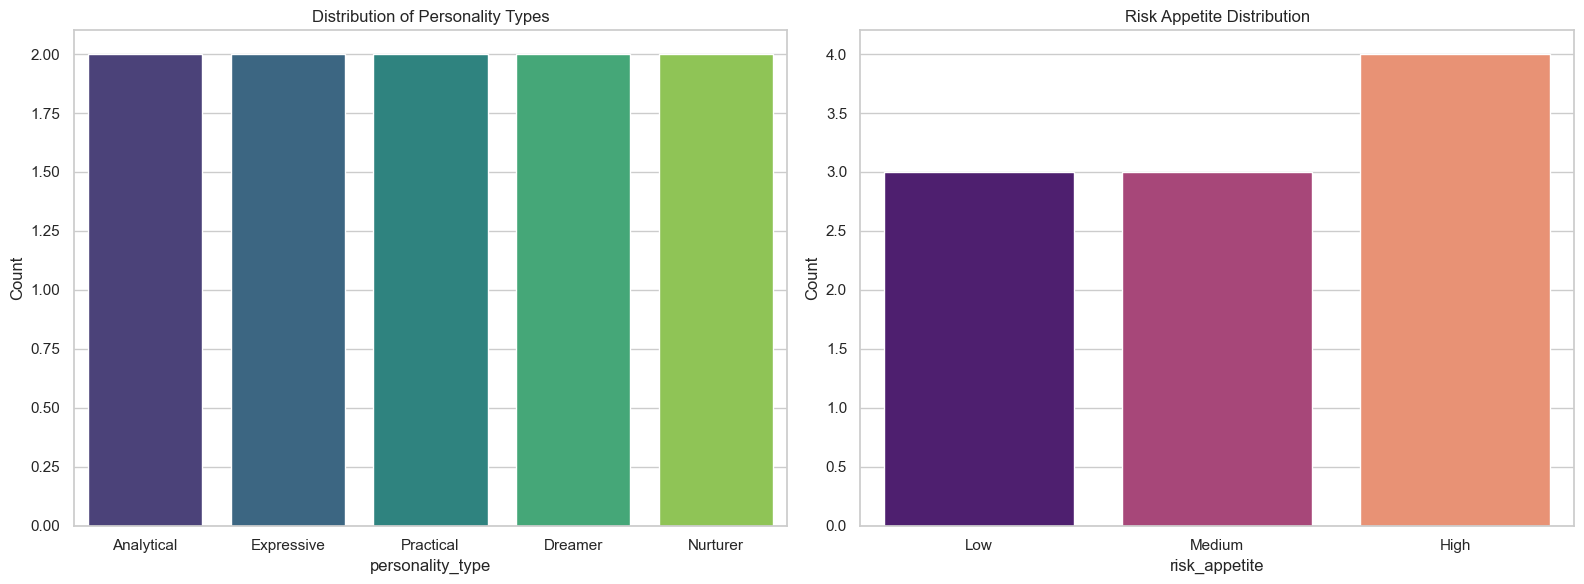

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Personality Distribution
sns.countplot(data=users, x='personality_type', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Personality Types')
axes[0].set_ylabel('Count')

# Risk Appetite
sns.countplot(data=users, x='risk_appetite', palette='magma', order=['Low', 'Medium', 'High'], ax=axes[1])
axes[1].set_title('Risk Appetite Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 4. Event Analysis
Understanding the nature of events is crucial for our "Stress Model". We look at Event Types and Intensity.

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2772\2996339397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='event_type', data=events, order=events['event_type'].value_counts().index, palette='coolwarm')


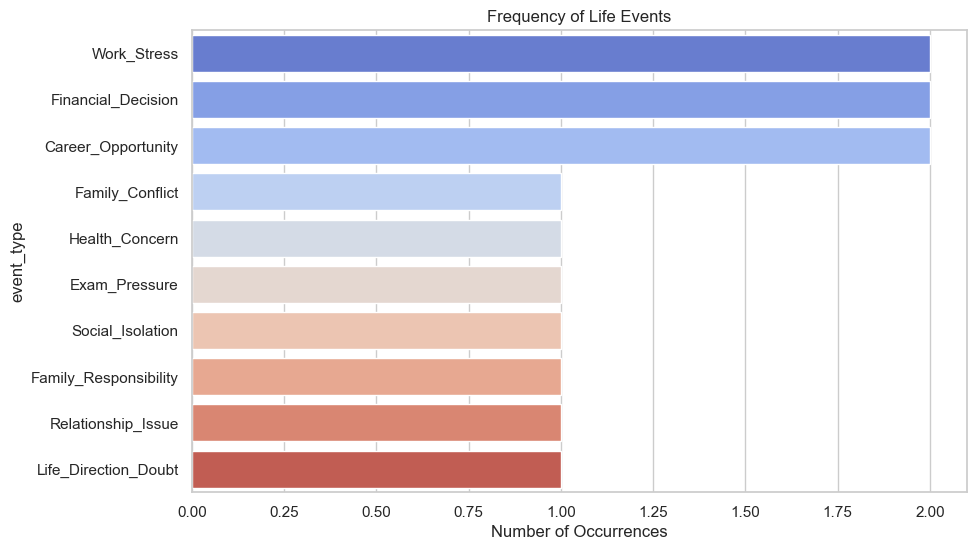

In [7]:
# Event Type Frequency
plt.figure(figsize=(10, 6))
sns.countplot(y='event_type', data=events, order=events['event_type'].value_counts().index, palette='coolwarm')
plt.title('Frequency of Life Events')
plt.xlabel('Number of Occurrences')
plt.show()

### 4.1 Intensity Analysis
Which events are the most intense? This helps validate our assumption that `High Intensity` -> `Stress`.

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_2772\3450059401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=events, x='event_intensity', y='event_type', palette='Set2')


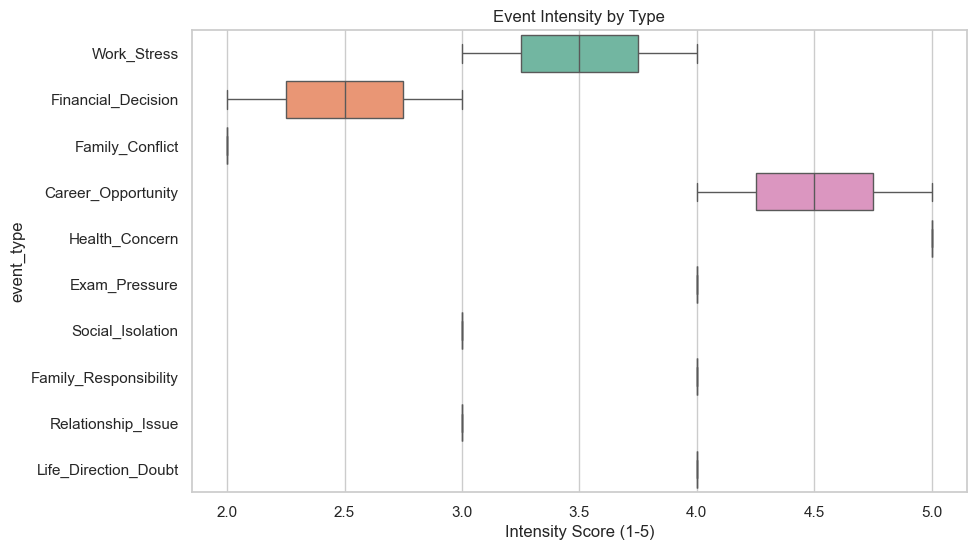

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=events, x='event_intensity', y='event_type', palette='Set2')
plt.title('Event Intensity by Type')
plt.xlabel('Intensity Score (1-5)')
plt.show()

## 5. Feature Engineering Prep
We plan to predict stress based on `Average Intensity`. Let's calculate and visualize this synthetic feature.

In [9]:
# Aggregating data per user
user_stats = events.groupby('user_id').agg(
    avg_intensity=('event_intensity', 'mean'),
    event_count=('event_id', 'count')
).reset_index()

# Merge with user traits for deeper insight
full_df = pd.merge(users, user_stats, on='user_id', how='left').fillna(0)

display(full_df.head())

,user_id,age,gender,city,profession,personality_type,risk_appetite,relationship_status,avg_intensity,event_count
0,1,27,M,Bangalore,Software Engineer,Analytical,High,Single,3.5,2
1,2,33,F,Mumbai,Marketing Manager,Expressive,Medium,Married,3.0,2
2,3,41,M,Delhi,Operations Lead,Practical,Low,Married,5.0,1
3,4,24,F,Pune,Student,Dreamer,Medium,Single,3.5,2
4,5,36,F,Hyderabad,Product Manager,Analytical,High,In a relationship,5.0,1


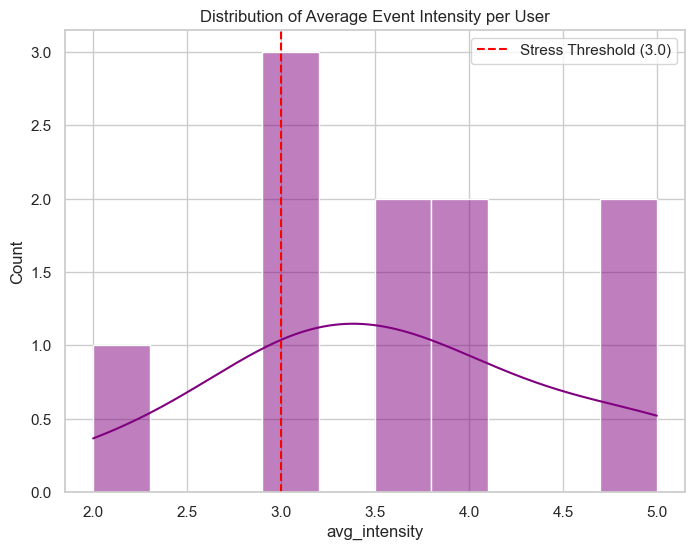

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(full_df['avg_intensity'], bins=10, kde=True, color='purple')
plt.axvline(x=3.0, color='red', linestyle='--', label='Stress Threshold (3.0)')
plt.title('Distribution of Average Event Intensity per User')
plt.legend()
plt.show()

## 6. Conclusion
- **Data Quality**: The data is clean and covers a mix of personalities.
- **Event Insights**: 'Health_Concern' and 'Work_Stress' tend to have higher intensities.
- **Modeling Strategy**: The distribution of `avg_intensity` suggests that a threshold of 3.0 divides the population well into "Stressed" and "Normal" groups, validating our simple ML approach.